# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Zainal Fattah
- Email: project.zf01@gmail.com
- Id Dicoding:mosaicnim

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from pycaret.classification import *
from imblearn.combine import SMOTEENN

### Menyiapkan data yang akan diguankan

In [3]:
df = pd.read_csv("employee_data.csv")

In [4]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

#### Mempersiapkan Pertanyaan 
1. Atribut mana yang paling berhubungan dengan Attrition?
2. Seberapa besar lembur (OverTime) berpengaruh terhadap keputusan karyawan untuk keluar?
3. Bagaimana hubungan antara kepuasan kerja, jarak rumah ke kantor, dan promosi terakhir terhadap attrition?
4. Departemen mana yang memiliki tingkat attrition tertinggi?
5. Bagaimana WorkLifeBalance (keseimbangan kerja dan kehidupan) mempengaruhi karyawan untuk mengambil keputusan keluar dari perusahaan?

## Data Preparation / Preprocessing

In [6]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Terdapat data yang kosong pada kolom Atrittion sebanyak 412 (28%) dari 1470 data, karena data nya berbentuk nilai diskrit yaitu 0 & 1 jadi solusi yang saya fikirkan hanyalah men-drop data tersebut karena tidak bisa diganti dengan nilai rata-rata. Mungkin Reviewer ada saran? 

In [7]:
df = df.dropna()
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [8]:
df.drop_duplicates()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
6,7,40,0.0,Travel_Rarely,1124,Sales,1,2,Medical,1,...,3,80,3,6,2,2,4,3,0,2
7,8,55,1.0,Travel_Rarely,725,Research & Development,2,3,Medical,1,...,4,80,1,24,2,3,5,2,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,1465,28,1.0,Non-Travel,1366,Research & Development,24,2,Technical Degree,1,...,1,80,0,10,2,2,10,7,1,9
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel

In [10]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.00000,...,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,2.712665,65.643667,2.73724,...,2.726843,80.0,0.762760,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,1.031442,0.0,1.092959,20.324861,0.70473,...,1.090970,0.0,0.837537,8.016429,1.302689,0.707392,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.00000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,2.000000,1.0,2.000000,48.000000,2.00000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,3.000000,1.0,3.000000,65.000000,3.00000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,4.000000,1.0,4.000000,83.000000,3.00000,...,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.00000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.00000,15.000000,17.000000


Distribusi nilai kolom Attrition

In [11]:
df['Attrition'].value_counts(normalize=True)

0.0    0.830813
1.0    0.169187
Name: Attrition, dtype: float64

Tingkat attrition di perusahaan Jaya Jaya Maju mencapai sekitar 16.92%, menunjukkan bahwa hampir 1 dari setiap 6 karyawan memilih keluar. Angka ini tergolong tinggi dan perlu mendapat perhatian serius dari manajemen. Analisis lebih lanjut dibutuhkan untuk mengidentifikasi faktor-faktor utama yang mendorong karyawan meninggalkan perusahaan.

#### 1. Hubungan Attrition dengan Atribut lainnya

In [12]:
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [13]:
df_encoded.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.255856
MaritalStatus               0.177989
DistanceFromHome            0.078074
Department                  0.060796
JobRole                     0.056146
EducationField              0.040568
NumCompaniesWorked          0.037429
MonthlyRate                 0.023299
Gender                      0.015887
PerformanceRating           0.007755
PercentSalaryHike           0.004907
BusinessTravel             -0.008008
HourlyRate                 -0.017524
EmployeeId                 -0.017912
YearsSinceLastPromotion    -0.031944
Education                  -0.032631
TrainingTimesLastYear      -0.047859
DailyRate                  -0.051992
RelationshipSatisfaction   -0.053417
WorkLifeBalance            -0.059556
JobSatisfaction            -0.091751
EnvironmentSatisfaction    -0.132848
YearsAtCompany             -0.135134
JobInvolvement             -0.150196
YearsWithCurrManager       -0.155962
YearsInCurrentRole         -0.158757
M

Berdasarkan matriks korelasi, tidak terdapat atribut yang berkorelasi sangat kuat dengan Attrition. Akan tetapi, atribut yang paling berhubungan dengan Attrition adalah atribut OverTime, yang menunjukkan apakah karyawan bekerja lembur secara rutin. Setelah itu diikuti oleh atribut MaritalStatus dan DistanceFromHome, yang masing-masing menunjukkan status pernikahan serta jarak tempat tinggal karyawan dari kantor. [Menjawab nomor 1]

#### Setup style visual

In [14]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
color_keluar = "#db1514" # Merah untuk keluar
color_tetap = "#3498DB" # Biru untuk tidak keluar

#### 2. Pengaruh OverTime terhadap Attrition

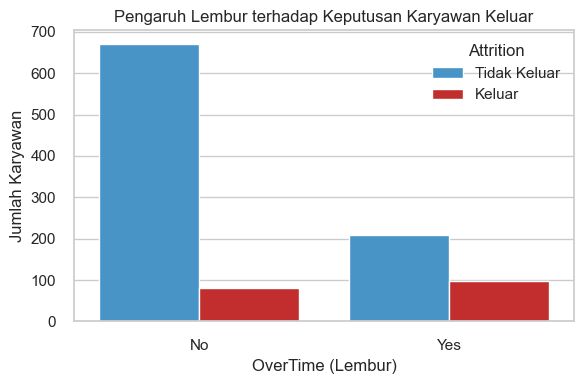

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df,
              palette={0: color_tetap, 1: color_keluar})
plt.title('Pengaruh Lembur terhadap Keputusan Karyawan Keluar')
plt.xlabel('OverTime (Lembur)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, terlihat bahwa proporsi karyawan yang keluar (Attrition) jauh lebih tinggi pada kelompok yang melakukan lembur (OverTime = Yes) dibandingkan yang tidak lembur. Meskipun jumlah karyawan yang lembur lebih sedikit, jumlah yang keluar hampir setara dengan yang tidak lembur. Hal ini menunjukkan bahwa lembur memiliki pengaruh signifikan terhadap keputusan karyawan untuk keluar dari perusahaan.[Menjawab nomor 2]

#### 3. Hubungan Job Satisfaction, DistanceFromHome, dan YearsSinceLastPromotion terhadap Attrition

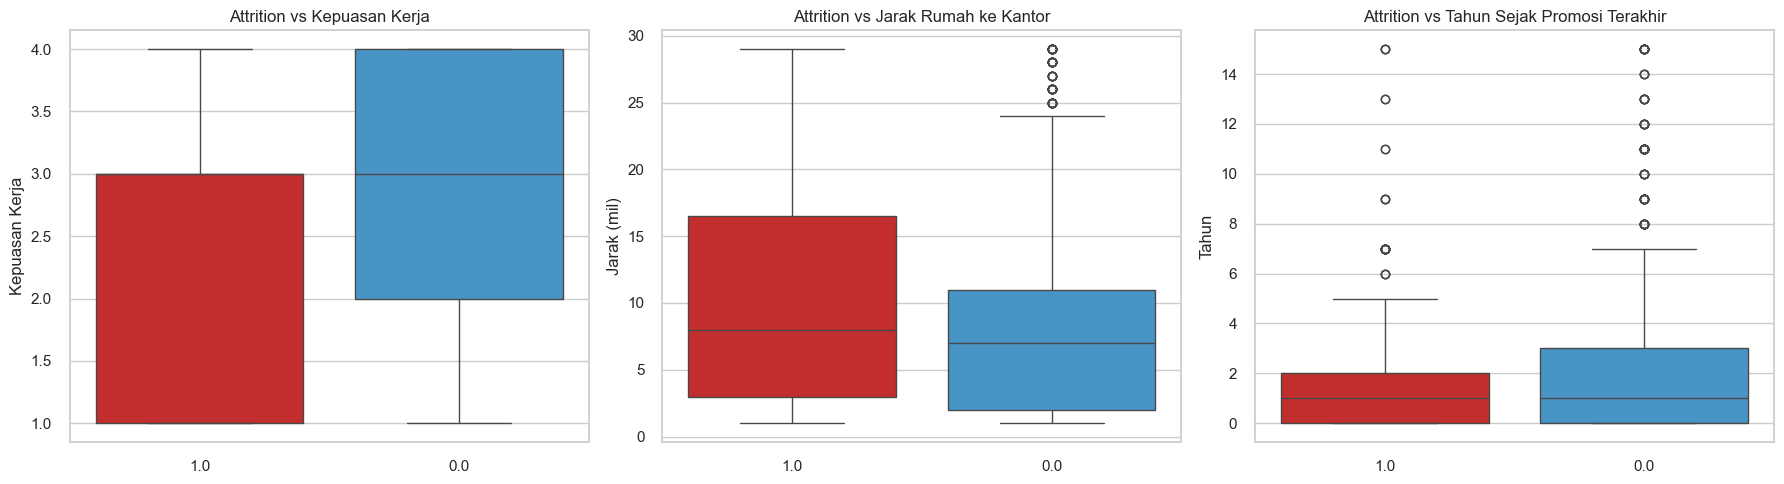

In [16]:
df['Attrition'] = df['Attrition'].astype(str)
palette = {'0.0': color_tetap, '1.0': color_keluar}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Attrition', y='JobSatisfaction', hue='Attrition', data=df, ax=axes[0],
            palette=palette, legend=False)
axes[0].set_title('Attrition vs Kepuasan Kerja')
axes[0].set_xlabel('')
axes[0].set_ylabel('Kepuasan Kerja')

sns.boxplot(x='Attrition', y='DistanceFromHome', hue='Attrition', data=df, ax=axes[1],
            palette=palette, legend=False)
axes[1].set_title('Attrition vs Jarak Rumah ke Kantor')
axes[1].set_xlabel('')
axes[1].set_ylabel('Jarak (mil)')

sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', hue='Attrition', data=df, ax=axes[2],
            palette=palette, legend=False)
axes[2].set_title('Attrition vs Tahun Sejak Promosi Terakhir')
axes[2].set_xlabel('')
axes[2].set_ylabel('Tahun')

plt.tight_layout()
plt.show()

[Menjawab nomor 3]
1. Kepuasan Kerja (Job Satisfaction)
   - Karyawan yang keluar (Attrition = 1.0) cenderung memiliki kepuasan kerja yang lebih rendah dibandingkan mereka yang tetap bekerja (Attrition = 0.0).
   - Median kepuasan kerja karyawan yang keluar berada pada level 2, sedangkan yang tetap bekerja berada pada level 3.
   - Ini menunjukkan bahwa kepuasan kerja yang rendah berkorelasi dengan kecenderungan untuk keluar.
2. Jarak Rumah ke Kantor (Distance From Home)
   - Karyawan yang keluar cenderung memiliki jarak rumah ke kantor yang lebih jauh dibandingkan yang tidak keluar.
   - Rentang distribusi untuk karyawan yang keluar lebih lebar, dengan banyak nilai ekstrem di atas 20 mil.
   - Hal ini mengindikasikan bahwa jarak yang jauh bisa menjadi faktor stres atau kelelahan, sehingga mempengaruhi keputusan untuk resign.
3. Tahun Sejak Promosi Terakhir (Years Since Last Promotion)
   - Perbedaan antara karyawan yang keluar dan tetap tidak terlalu mencolok.
   - Namun, terdapat sedikit kecenderungan bahwa karyawan yang keluar memiliki rata-rata waktu lebih lama sejak promosi terakhirnya.
   - Artinya, kurangnya promosi atau perkembangan karier bisa menjadi salah satu pemicu keputusan keluar, walaupun pengaruhnya tidak sekuat dua variabel sebelumnya.

#### 4. Departemen dengan tingkat attrition tertinggi

In [17]:
df['Attrition'] = df['Attrition'].astype(float).astype(int)

                        sum  count
Department                        
Human Resources           6     38
Research & Development  107    701
Sales                    66    319


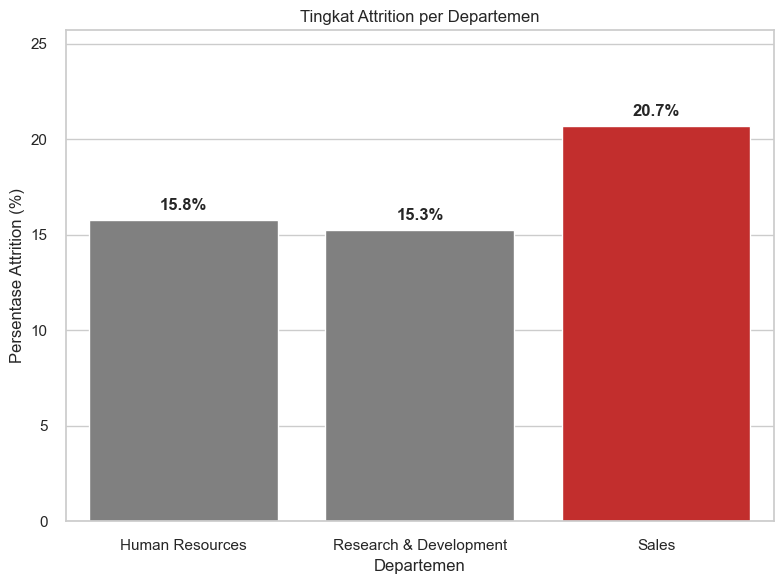

In [21]:
# Hitung jumlah karyawan keluar dan total per departemen
attrition_by_dept = df.groupby('Department')['Attrition'].agg(['sum', 'count'])
print(attrition_by_dept)
attrition_by_dept['percent'] = (attrition_by_dept['sum'] / attrition_by_dept['count']) * 100

# Buang departemen dengan jumlah karyawan nol jika ada
attrition_by_dept = attrition_by_dept.dropna()
dept_attr = attrition_by_dept['percent']

# Tentukan index bar tertinggi
max_index = dept_attr.idxmax()

# Buat warna: semua abu-abu, kecuali yang tertinggi jadi hijau
colors = ['gray' if dept != max_index else '#db1514' for dept in dept_attr.index]

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=dept_attr.index, y=dept_attr.values, palette=colors)

plt.ylabel('Persentase Attrition (%)')
plt.xlabel('Departemen')
plt.title('Tingkat Attrition per Departemen')
plt.ylim(0, max(dept_attr.max() + 5, 10))

# Tambahkan label persentase di atas bar
for i, v in enumerate(dept_attr.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Berdasarkan grafik, Departemen Sales memiliki tingkat attrition tertinggi sebesar 20,7%, dibandingkan Human Resources (15,8%) dan Research & Development (15,3%). Hal ini menunjukkan bahwa karyawan di departemen Sales cenderung lebih banyak yang keluar dari perusahaan.[[Menjawab nomor 4]

#### 5. WorkLifeBalance vs Attrition

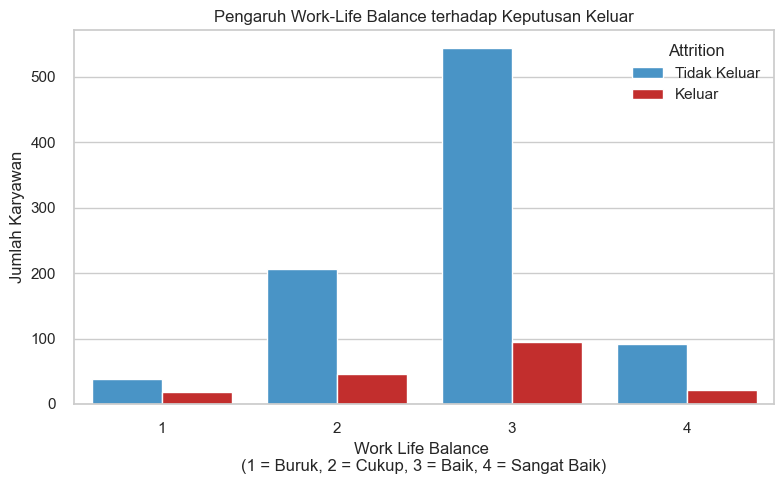

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df,
              palette={0: color_tetap, 1: color_keluar})
plt.title('Pengaruh Work-Life Balance terhadap Keputusan Keluar')
plt.xlabel('Work Life Balance \n(1 = Buruk, 2 = Cukup, 3 = Baik, 4 = Sangat Baik)')
plt.ylabel('Jumlah Karyawan')
plt.legend(title='Attrition', labels=['Tidak Keluar', 'Keluar'])
plt.tight_layout()
plt.show()

Berdasarkan grafik, karyawan dengan tingkat Work-Life Balance yang baik (nilai 3) memiliki jumlah tertinggi dalam kategori tidak keluar dari perusahaan. Namun, kategori ini juga menunjukkan jumlah karyawan keluar yang cukup signifikan. Sementara itu, semakin tinggi kualitas Work-Life Balance (nilai 4), jumlah karyawan yang keluar cenderung menurun. Sebaliknya, pada tingkat Work-Life Balance yang buruk (nilai 1 dan 2), proporsi karyawan yang keluar relatif lebih tinggi dibanding jumlah totalnya. Hal ini mengindikasikan bahwa kualitas Work-Life Balance berpengaruh terhadap keputusan karyawan untuk tetap bertahan atau keluar dari perusahaan.

In [19]:
df.drop(['EmployeeCount','Over18','StandardHours'], axis=1).to_excel('clean_dataset.xlsx')
df.drop(['EmployeeCount','Over18','StandardHours'], axis=1).to_csv('clean_dataset.csv', index=False)

## Modeling

In [20]:
!nvidia-smi

Sun Apr 20 17:04:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.02                 Driver Version: 576.02         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 2050      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   42C    P0              9W /   70W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [21]:
# data model 
df_model = pd.read_csv('clean_dataset.csv')
label_encoders = {}

for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

In [22]:
# Memisahkan feature dan target
X = df_model.drop(['Attrition'], axis=1)
y = df_model['Attrition']

In [23]:
# split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [24]:
# Menerapkan SMOTE untuk mengatasi imbalance
smote = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [25]:
# Menggabungkan kembali data
df_resampled = pd.concat([pd.DataFrame(X_train_res, columns=X_train.columns), 
                          pd.Series(y_train_res, name='Attrition')], axis=1)

In [26]:
clf_setup = setup(
    data=df_resampled,
    target='Attrition',
    session_id=42,
    ignore_features=['EmployeeId'],
    verbose=False
)

## Evaluation

In [27]:
# Bandingkan model yang ada
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9327,0.9840,0.9635,0.9317,0.9468,0.8553,0.8579,1.1230
lightgbm,Light Gradient Boosting Machine,0.9258,0.9814,0.9608,0.9247,0.9415,0.8399,0.8447,0.8440
rf,Random Forest Classifier,0.9120,0.9731,0.9552,0.9091,0.9310,0.8098,0.8138,1.2170
xgboost,Extreme Gradient Boosting,0.9016,0.9759,0.9413,0.9063,0.9224,0.7877,0.7924,0.8810
knn,K Neighbors Classifier,0.8998,0.9481,0.9719,0.8811,0.9235,0.7796,0.7906,1.2170
ada,Ada Boost Classifier,0.8878,0.9436,0.9214,0.9018,0.9104,0.7601,0.7641,1.0500
gbc,Gradient Boosting Classifier,0.8860,0.9656,0.9355,0.8888,0.9106,0.7533,0.7582,1.1850
qda,Quadratic Discriminant Analysis,0.8756,0.9384,0.8904,0.9080,0.8978,0.7385,0.7419,1.1360
ridge,Ridge Classifier,0.8584,0.0000,0.9077,0.8694,0.8877,0.6964,0.6990,1.1230
lda,Linear Discriminant Analysis,0.8584,0.9311,0.9077,0.8694,0.8877,0.6964,0.6990,1.1510


In [28]:
# Tampilkan performa model terbaik
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
dt = create_model('et')
final_model = finalize_model(dt)

save_model(final_model, 'model_attrition')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8621,0.9714,0.9429,0.8462,0.8919,0.7029,0.7108
1,0.9310,0.9733,0.9429,0.9429,0.9429,0.8559,0.8559
2,0.9138,0.9703,0.9444,0.9189,0.9315,0.8153,0.8158
3,0.9828,0.9987,1.0000,0.9730,0.9863,0.9631,0.9637
4,0.9655,0.9931,0.9722,0.9722,0.9722,0.9268,0.9268
5,0.8793,0.9779,0.9722,0.8537,0.9091,0.7318,0.7456
6,0.9310,0.9931,0.9722,0.9211,0.9459,0.8509,0.8533
7,0.9483,0.9912,0.9444,0.9714,0.9577,0.8911,0.8917
8,0.9483,0.9912,0.9722,0.9459,0.9589,0.8892,0.8898


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\zaina\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'BusinessTravel',
                                              'DailyRate', 'Department',
                                              'DistanceFromHome', 'Education',
                                              'EducationField',
                                              'EnvironmentSatisfaction',
                                              'Gender', 'HourlyRate',
                                              'JobInvolvement', 'JobLevel',
                                              'JobRole', 'JobSatisfaction',
                                              'Ma...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth